In [2]:
import RTBridge as rtb
import numpy as np
from functions import *
from scipy.signal import stft
import scipy.signal as signal
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
import wave
from sklearn.preprocessing import MinMaxScaler


In [11]:
sxx = spect_preprocessing('./new_target.wav',15000)


activation = np.loadtxt('./Activations/Experiment_v0_04_activations.txt')[100:,:]
model = inverse_mapping_func(np.transpose(sxx),activation,0.1)

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:118: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


Epoch 1/20


2023-05-03 23:39:13.762164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 3s 5ms/step - loss: 0.5723 - mse: 0.1208 - val_loss: 0.5698 - val_mse: 0.1294
Epoch 2/20
  1/422 [..............................] - ETA: 3s - loss: 0.5510 - mse: 0.1106

2023-05-03 23:39:16.000062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 2s 6ms/step - loss: 0.5578 - mse: 0.1194 - val_loss: 0.5696 - val_mse: 0.1293
Epoch 3/20
422/422 [==============================] - 2s 6ms/step - loss: 0.5575 - mse: 0.1192 - val_loss: 0.5735 - val_mse: 0.1313
Epoch 4/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5572 - mse: 0.1191 - val_loss: 0.5739 - val_mse: 0.1314
Epoch 5/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5568 - mse: 0.1189 - val_loss: 0.5772 - val_mse: 0.1331
Epoch 6/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5566 - mse: 0.1188 - val_loss: 0.5764 - val_mse: 0.1327
Epoch 7/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5564 - mse: 0.1187 - val_loss: 0.5782 - val_mse: 0.1338
Epoch 8/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5561 - mse: 0.1186 - val_loss: 0.5795 - val_mse: 0.1345
Epoch 9/20
422/422 [==============================] - 2s 5ms/step - loss: 0.5559 - mse:

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_52227/1346439920.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./new_target.wav')
/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_52227/1346439920.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(10*np.log10(np.abs(sxx)))


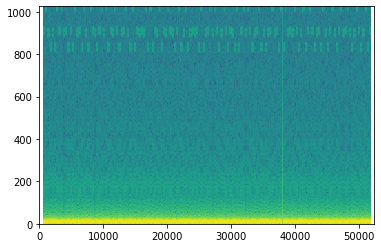

In [18]:
fs, music = wavfile.read('./new_target.wav')
music = music[:,1]
t,f,sxx = stft(music,fs,'hann',nfft=2048)
plt.pcolormesh(f,t,10*np.log10(np.abs(sxx)))

 92/469 [====>.........................] - ETA: 0s

2023-05-03 23:40:22.306347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 1s 2ms/step


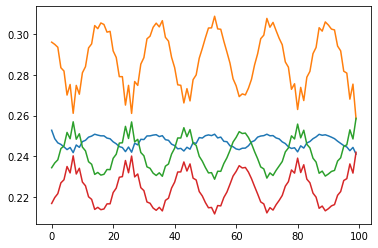

In [12]:
x = model.predict(np.transpose(sxx))
plt.plot(x[100:200,:])

In [8]:
import tensorflow as tf
from keras import layers

def create_model(music_spect,limb_activations,test_size):

    x_train, y_train, x_test, y_test = train_test_split(music_spect,limb_activations,test_size)
    num_classes = np.shape(limb_activations)[-1]
    input_shape = np.shape(x_train)+(1,)
    
    model = tf.keras.Sequential()
    
    # Add a 2D convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation function
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    
    # Add a 2D max pooling layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add another 2D convolutional layer with 64 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a third 2D convolutional layer with 128 filters and a kernel size of (3, 3), followed by a max pooling layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add a flatten layer to transform the output of the convolutional layers to a 1D vector
    model.add(layers.Flatten())
    
    # Add a dense layer with 512 units and a ReLU activation function
    model.add(layers.Dense(512, activation='relu'))
    
    # Add a dense layer with 4*100=400 units and a sigmoid activation function
    model.add(layers.Dense(4*np.shape(y_train)[0], activation='sigmoid'))
    
    # Reshape the output to a matrix with shape (4, 100)
    model.add(layers.Reshape(np.shape(y_train)[0]))
    
    # Compile the model with mean squared error loss and the Adam optimizer
    model.compile(loss='mse',
                  optimizer='adam')
    model.fit(x_test,y_train)
    
    return model

In [10]:
model = create_model(sxx,x,0.1)

ResourceExhaustedError: OOM when allocating tensor with shape[12946176,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator Simple allocator [Op:RandomUniform]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                5010      
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 5,054
Trainable params: 5,054
Non-trainable params: 0
_________________________________________________________________


/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:92: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


13/13 [==============================] - 0s 2ms/step


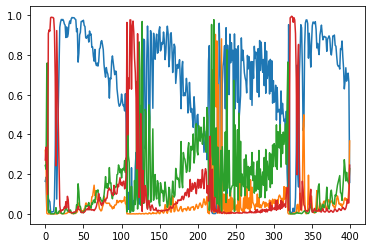

In [17]:
target_sxx = spect_preprocessing('./target_2.wav',400)
x = model.predict(np.transpose(target_sxx))
plt.plot(x)
np.savetxt('./train_activations/activation_3.txt',x)


In [5]:
x = np.loadtxt('./Activations/prescribed_activation.txt')

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_56787/1652526006.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read('./target_for_test.wav')


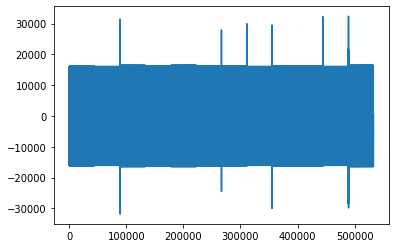

In [67]:
fs, music = wavfile.read('./target_for_test.wav')
music = music[:,1]
i1 = find_first_index(music)
i2 = find_last_index(music[i1:],i1,fs)
plt.plot(music[i1:549045])

In [58]:
(549045.0-i1)/fs

12.085918367346938

In [3]:
music_spect = spect_preprocessing('./target_for_test.wav',1200,549045)

/Users/hesamazad/Documents/GitHub/MusicianHand/functions.py:118: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, music = wavfile.read(logdir)


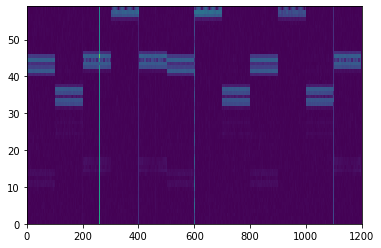

In [4]:
plt.pcolormesh(music_spect)

In [3]:
fs,music = wavfile.read('./target_for_test.wav')
f,t,Sxx=stft(music,fs,'hann',nfft=2048)

/var/folders/b9/n530p3715jz14d00bjmthznh0000gn/T/ipykernel_63935/2235051002.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,music = wavfile.read('./target_for_test.wav')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


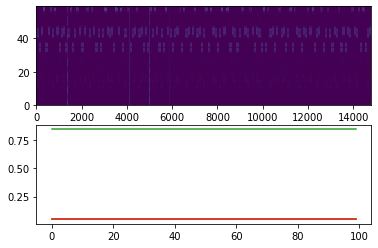

In [51]:
x = np.loadtxt('./Activations/Experiment_v0_05_activations.txt')
plt.subplot(2,1,1)
plt.pcolormesh(music_spect)
plt.subplot(2,1,2)

plt.plot(x[700:800,:])

activations = x[100:-200]

In [5]:


model = inverse_mapping_func2(np.transpose(music_spect),activations,0.1)

2023-05-04 13:04:16.059052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-04 13:04:16.059275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2023-05-04 13:04:16.796392: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-04 13:04:17.001980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 3s 5ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 2/10
 15/417 [>.............................] - ETA: 1s - loss: 0.1217 - mse: 0.1217

2023-05-04 13:04:19.884873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 2s 4ms/step - loss: 0.1211 - mse: 0.1211 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 3/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1209 - mse: 0.1209 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 4/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1209 - mse: 0.1209 - val_loss: 0.1040 - val_mse: 0.1040
Epoch 5/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1209 - mse: 0.1209 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 6/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 7/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1039 - val_mse: 0.1039
Epoch 8/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1038 - val_mse: 0.1038
Epoch 9/10
417/417 [==============================] - 2s 4ms/step - loss: 0.1208 - mse:

In [2]:
x = spect_preprocessing('./test_5.wav',1900)
plt.pcolormesh(10*np.log10(x))

TypeError: spect_preprocessing() missing 1 required positional argument: 'i2'

In [1]:
fs,music = wavfile.read('./target_for_test.wav')


NameError: name 'wavfile' is not defined

In [ ]:
f,t,Sxx = stft(music,fs,'hann',nfft=2048)

38/38 [==============================] - 0s 4ms/step
[2. 1. 4. 3. 4. 2. 3. 1. 2. 3. 1. 4.]
38/38 [==============================] - 0s 3ms/step


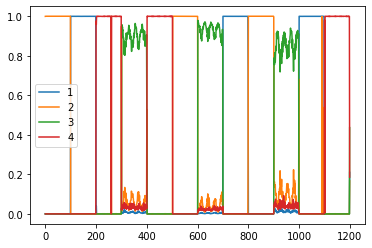

In [66]:
plt.plot(model.predict(np.transpose(music_spect))[:,:])
plt.legend(('1','2','3','4'))
array = [1,0,3,2,3,1,2,0,1,2,0,3]+np.ones(12)
print(array)

np.savetxt('./train_activations/predicted_activation.txt',model.predict(np.transpose(music_spect)))


In [44]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.keras.backend as K

def softmax_with_temperature(x, temperature=1.0):
    return K.softmax(x / temperature)

def inverse_mapping_func3(music_spect, limb_activations, test_size):# my version of this function
    x_train, y_train, x_test, y_test = train_test_split(music_spect,limb_activations,test_size)
    outputs = np.shape(limb_activations)[-1]
    layers = [
        Dense(units=20, input_shape =(np.shape(x_train[1],)), activation = "linear"),
        Dense(units = 4, activation=lambda x: softmax_with_temperature(x, temperature=0.01)),
    ]
    model = Sequential(layers)
   # model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['mse'])
    model.compile(optimizer='adam',loss='mse', metrics = ['mse'])

    model.fit(x_train,y_train, epochs=10,validation_data = (x_test,y_test))
    return model 

In [45]:
model = inverse_mapping_func3(np.transpose(music_spect),activations,0.1)

Epoch 1/10
  9/417 [..............................] - ETA: 2s - loss: 0.1273 - mse: 0.1273  

2023-05-04 13:26:58.085432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 3s 6ms/step - loss: 0.0951 - mse: 0.0951 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 2/10
 11/417 [..............................] - ETA: 2s - loss: 0.0934 - mse: 0.0934

2023-05-04 13:27:00.443681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 2s 5ms/step - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 3/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 4/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 5/10
417/417 [==============================] - 2s 4ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0460 - val_mse: 0.0460
Epoch 6/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 7/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 8/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 9/10
417/417 [==============================] - 2s 5ms/step - loss: 0.0912 - mse:

In [54]:
temp = np.ones(100)
activation = np.ones((4,1200))*0.05
array = [1,0,3,2,3,1,2,0,1,2,0,3]
for k in range(12):

    activation[array[k],k*100:(k+1)*100] = temp

np.savetxt('./Activations/prescribed_activation_2.txt',np.transpose(activation))